# Project – Forecasting of Oil Prices

# Objective
Oil is a product that goes completely in a different direction for a single market event as the oil prices are rarely based on real-time data, instead, it is driven by externalities making our attempt to forecast it even more challenging.

As the economy will be highly affected by oil prices our model will help to understand the pattern in prices to help the customers and businesses to make smart decisions.

# Problem Statement
Nowadays crude oil is essential commodity in day to day life its difficult to be aware of oil prices in future thats why we have come up with oil price prediction model our model will predict oil price so that consumers or bussinesses make effective decisions.

# About the dataset
we have took the dataset from well known company called Brent Oil Pty Ltd from 1987 to 2022 this dataset will include

Source:-On Brent oil dataset-https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RBRTE&f=M

In [185]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib as mpl
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [186]:
df = pd.read_csv("Brent Oil Prices.csv")
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
...,...,...
9029,"Dec 13, 2022",80.14
9030,"Dec 14, 2022",83.33
9031,"Dec 15, 2022",82.34
9032,"Dec 16, 2022",80.20


## 1. Exploratory Data Analysis-EDA

The df.info() function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date                                              9034 non-null   object 
 1   Europe Brent Spot Price FOB (Dollars per Barrel)  9034 non-null   float64
dtypes: float64(1), object(1)
memory usage: 141.3+ KB


In [188]:
df.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [189]:
df.shape

(9034, 2)

Using this function, you can see the number of null values, datatypes, and memory usage as shown in the above outputs along with descriptive statistics.

In [190]:
# Describing the data
df.describe()

,Europe Brent Spot Price FOB (Dollars per Barrel)
count,9034.000000
mean,48.513844
std,32.872174
min,9.100000
25%,19.050000
50%,39.030000
75%,70.520000
max,143.950000


In [191]:
df.median()

Europe Brent Spot Price FOB (Dollars per Barrel)    39.03
dtype: float64

In [192]:
df.mode()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"Apr 01, 1991",18.48
1,"Apr 01, 1992",NaN
2,"Apr 01, 1993",NaN
3,"Apr 01, 1996",NaN
4,"Apr 01, 1997",NaN
...,...,...
9029,"Sep 30, 2016",NaN
9030,"Sep 30, 2019",NaN
9031,"Sep 30, 2020",NaN
9032,"Sep 30, 2021",NaN


In [193]:
print(f"Date range of oil prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of oil prices available from - May 20, 1987 to Dec 19, 2022


## 2. Duplicate values / Null Values

Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [194]:
df.isnull().sum()

Date                                                0
Europe Brent Spot Price FOB (Dollars per Barrel)    0
dtype: int64

You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data

In [195]:
df.duplicated().sum()

0

Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

## 3. Know the datatypes

In [196]:
#Datatypes
df.dtypes

Date                                                 object
Europe Brent Spot Price FOB (Dollars per Barrel)    float64
dtype: object

In [197]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


In [198]:
df=df.rename({'Date':'date', 'Europe Brent Spot Price FOB (Dollars per Barrel)':'Price'},axis=1)
df

,date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


In [199]:
df['date']=pd.to_datetime(df['date']) 
df.dtypes

date     datetime64[ns]
Price           float64
dtype: object

In [200]:
df[df.duplicated()]

,date,Price


In [201]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
#df = df.set_index('Date')
df.head()

,date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


## 4. Visualization

In [202]:
df_eda = df.copy()
df_eda.set_index('date', inplace=True)

In [203]:
from scipy.stats import skew
print(skew(df.Price))

0.7575132286450681


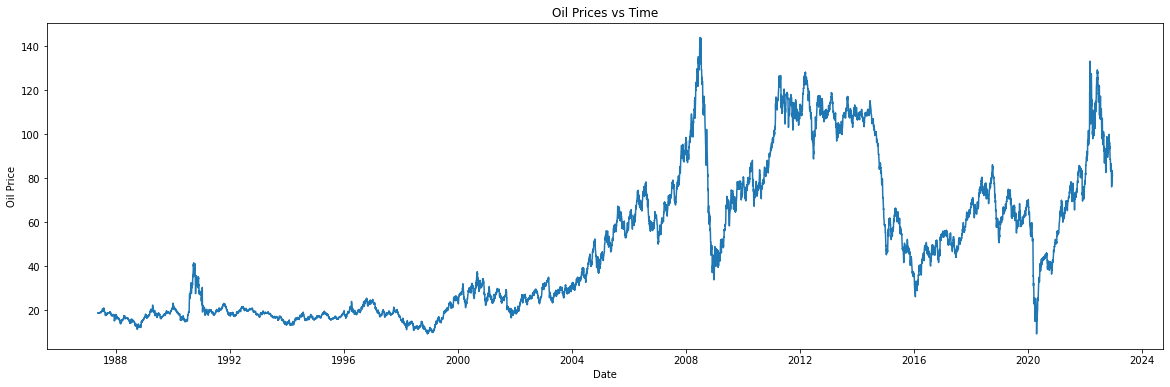

In [204]:
# line plot
plt.figure(figsize=(20, 6))
sns.lineplot(y='Price', x='date', data=df);
plt.title('Oil Prices vs Time');
plt.xlabel('Date');
plt.ylabel('Oil Price');

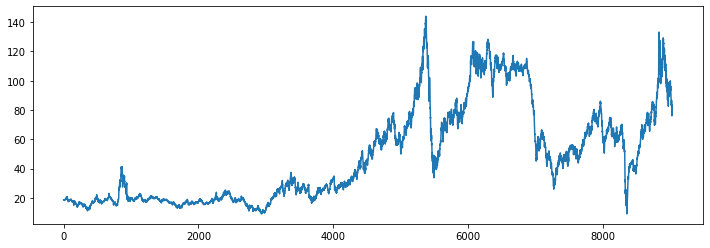

In [205]:
# Mean inputation
df = df.assign(Mean_imputation = df['Price'].fillna(df['Price'].mean()))
df['Mean_imputation'].plot(figsize=(12,4))

In [206]:
df = df.assign(Linear_Interpolation = df['Price'].interpolate(method='linear'))
df.head()

,date,Price,Mean_imputation,Linear_Interpolation
0,1987-05-20,18.63,18.63,18.63
1,1987-05-21,18.45,18.45,18.45
2,1987-05-22,18.55,18.55,18.55
3,1987-05-25,18.60,18.60,18.60
4,1987-05-26,18.63,18.63,18.63


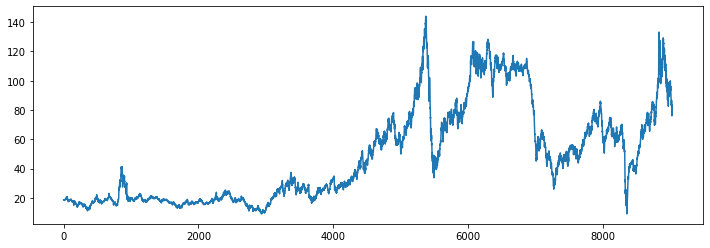

In [207]:
df['Linear_Interpolation'].plot(figsize=(12,4))

We will go with the linear interpolation for imputing missing values.

# Outlier Detection

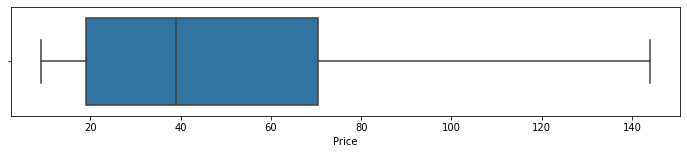

In [208]:
#Box Plot
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df['Price'], whis=1.5)

## Histogram

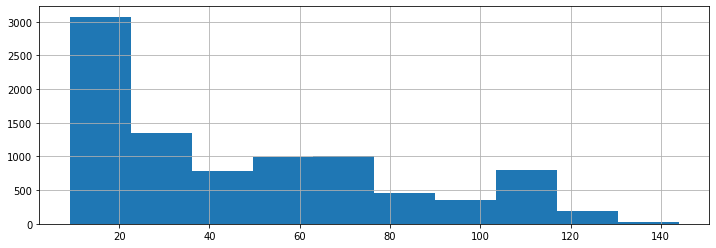

In [209]:
df['Price'].hist(figsize=(12,4))

**Conclusion:** There is no outliers detected.

In [210]:
df.head()

,date,Price,Mean_imputation,Linear_Interpolation
0,1987-05-20,18.63,18.63,18.63
1,1987-05-21,18.45,18.45,18.45
2,1987-05-22,18.55,18.55,18.55
3,1987-05-25,18.60,18.60,18.60
4,1987-05-26,18.63,18.63,18.63


In [211]:
df = df.drop(['Price', 'Mean_imputation'], axis=1)

In [212]:
df.rename(columns={'Linear_Interpolation' : 'Price'}, inplace=True)

In [213]:
df.head()

,date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


## Time series decomposition

**Additive seasonal decomposition** 

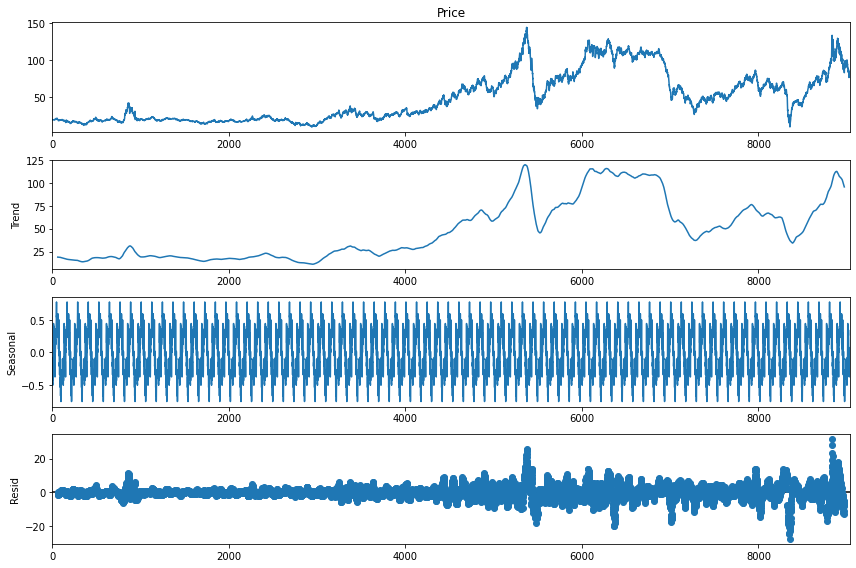

In [214]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df['Price'], model='additive',period=120)
fig = decomposition.plot()
plt.show()

#Analysis:- Observed - Actual data

**Trend** - Increasing or decreasing trend.

**Seasonal** - Varies from +0.5 to -0.5 with the mean 0. Each cycle represents each year trend. The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 1988 Nov, the seasonal value is +0.5 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 0.5+100 = 100.5

**Residual** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

**Multiplicative seasonal decomposition** 

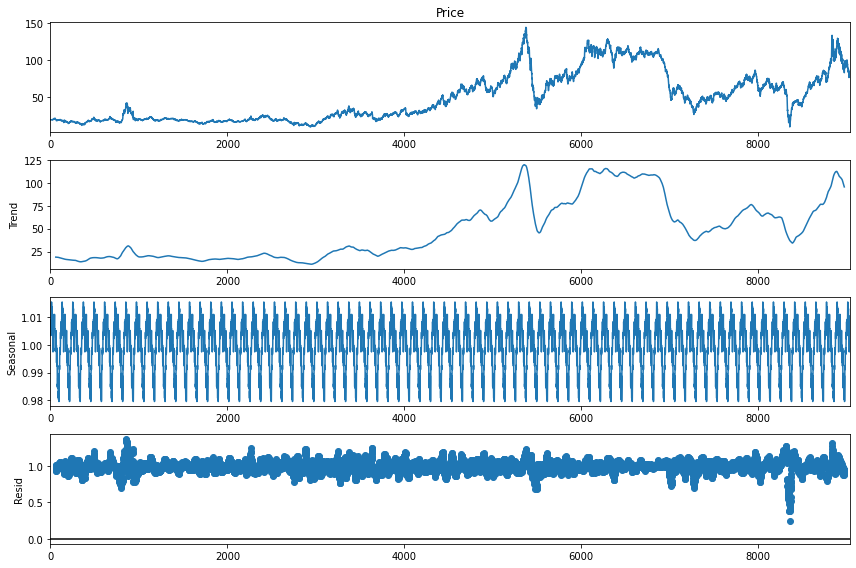

In [215]:
decomposition = sm.tsa.seasonal_decompose(df['Price'], model='multiplicative',period=120)
fig = decomposition.plot()
plt.show()

#Analysis:- Seasonal -

Varies from 0.98 to 1.01 The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year. E.g.:- For the year 1988 Nov, the seasonal value is 1.01 and the trend value is 100. Hence, the actual value(price) will (seasonal X Trend) value = 1.01 X 100 = 101

# Displot
To check the Normality of Data

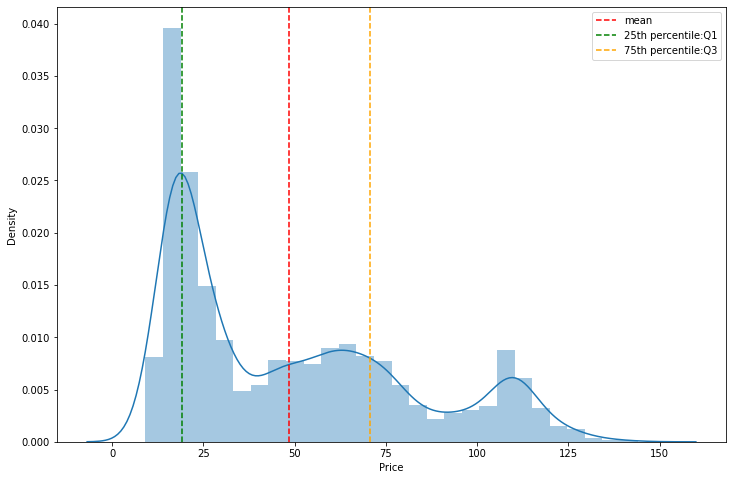

In [216]:
sns.distplot(df['Price'])
plt.axvline(x=np.mean(df['Price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

We can see from above's Displot Data is not Normally Distibuted.

## Visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [217]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 5, df.weekday)
df_year = df[['Price','year']].groupby(by='year').sum().reset_index()

df_year

,year,Price
0,1987,2964.13
1,1988,3800.88
2,1989,4629.97
3,1990,6082.93
4,1991,5150.57
5,1992,4965.17
6,1993,4287.38
7,1994,3995.81
8,1995,4305.01
9,1996,5242.51


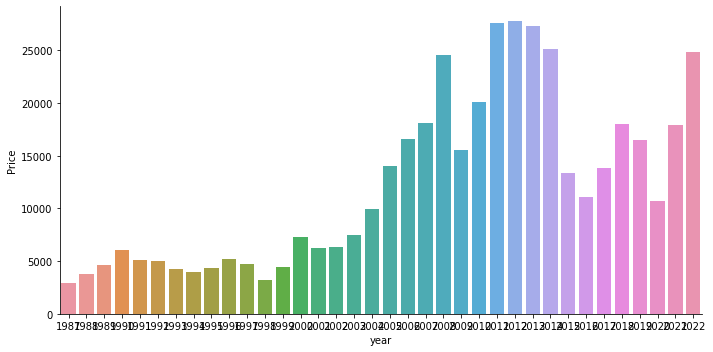

In [218]:
sns.catplot(x='year',y='Price',data=df_year,kind='bar',aspect=2)

## Trend

Visualizing changes in mean Over 365 days

In [219]:
df_eda=df.copy()
df_eda.set_index('date',inplace=True)

In [220]:
df_eda

,Price,year,month,day,weekday
date,,,,,
1987-05-20,18.63,1987,5,20,2
1987-05-21,18.45,1987,5,21,3
1987-05-22,18.55,1987,5,22,4
1987-05-25,18.60,1987,5,25,5
1987-05-26,18.63,1987,5,26,1
...,...,...,...,...,...
2022-12-13,80.14,2022,12,13,1
2022-12-14,83.33,2022,12,14,2
2022-12-15,82.34,2022,12,15,3


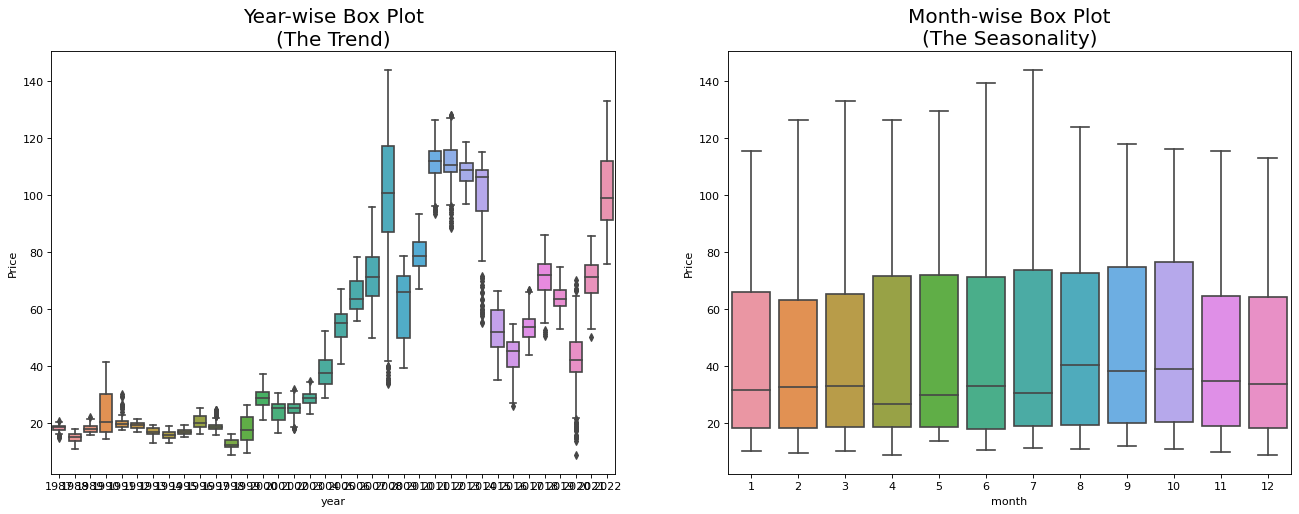

In [221]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price', data=df, ax=axes[0])
sns.boxplot(x='month', y='Price', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [222]:
df.corr()

,Price,year,month,day,weekday
Price,1.000000,0.721456,0.004722,-0.001311,-0.001657
year,0.721456,1.000000,-0.022365,-0.004213,-0.001515
month,0.004722,-0.022365,1.000000,-0.012698,0.011067
day,-0.001311,-0.004213,-0.012698,1.000000,-0.000314
weekday,-0.001657,-0.001515,0.011067,-0.000314,1.000000


## Heat Map

<function matplotlib.pyplot.show(*args, **kw)>

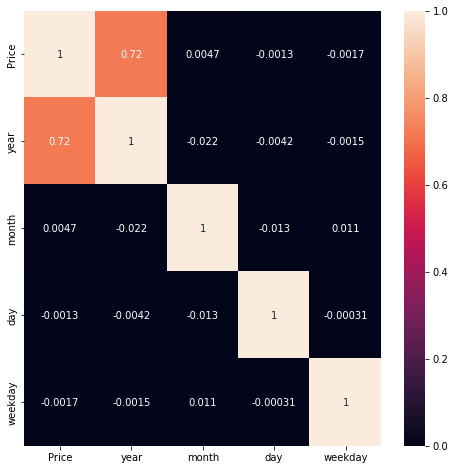

In [223]:
# Correlation plot

corr_matrix=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr_matrix,annot=True,vmin=0)
plt.show

## Test Of stationarity

## 1. ADF TEST

In [224]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [225]:
adf_test(df['Price'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.122381
p-value                           0.235611
#Lags Used                       29.000000
Number of Observations Used    9004.000000
Critical Value (1%)              -3.431076
Critical Value (5%)              -2.861861
Critical Value (10%)             -2.566941
dtype: float64


**Analysis** 

p-value (0.23) > critical value(0.05) .

Failed to reject null hypothesis (The series is not stationary)

Hence, the time series is Non-Stationary.

# 2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [226]:
from statsmodels.tsa.stattools import kpss

In [227]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [228]:
kpss_test(df['Price'])

Results of KPSS Test:
Test Statistic            9.58663
p-value                   0.01000
#Lags Used               57.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


**Analysis** 

p-val(0.01) < Critical value(0.05) Reject the null hypothesis (The series is stationary)

Hence, as per alternate hypothesis the time series is non stationary

## Converting Non-Stationary to Stationary Time Series

To make our Data Stationary We apply Some Methods

1. Transformation
i) Log Tranformation ii) Square root Transformation iii) Log Differencing Method iv) Square root differencing

2. Box-Cox Transformation
3. Differencing

**1. i) Log transforming of the data** 

In [229]:
df_log=np.sqrt(df['Price'])
df_diff=df_log.diff().dropna()
df_compare=df_log

In [230]:
# using ADF test
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -20.676580
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Analysis: Test Statistic > Critical Value and p-value < 0.05. But Looks Reversed, -20.676580 < -2.862 and 0.0000 < 0.05



In [231]:
# Using KPSS Test
result_kpss_ct_log=kpss(df_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.030000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


Test Statistic > Critical Value and p-value < 0.05. here looks Reversed 0.030000 < 0.146 and 0.100000 < 0.05

From this we conclude that our data is stationary.

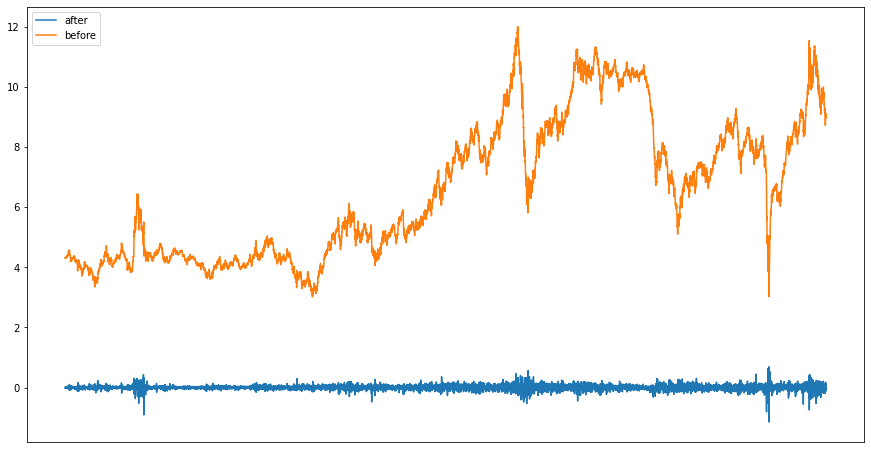

In [232]:
# Comparing both test Before Transformation and After Transformation
plt.figure(figsize=(15,8))
plt.plot(df_diff,label="after")
plt.plot(df_compare,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 

**Analysis:**

As we can see Our Original Series and Before Transformation after Tranformation

**2. Box Cox Transformation** 
Box-Cox transformation makes the variance constant in a series.

In [233]:
from scipy.stats import boxcox

In [234]:
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(df['Price'], lmbda=0), df_eda.index)

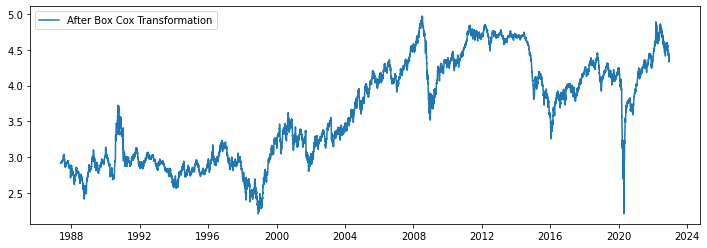

In [235]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

**Analysis** 

1.We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.

2.But we can see that still the series has an upward trend. So, the mean is not constant yet. Hence, we need to do Differencing for making the mean constant.



**3.** **Differencing** 

In [236]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=df_eda.index)


In [237]:
data_boxcox_diff.dropna(inplace=True)

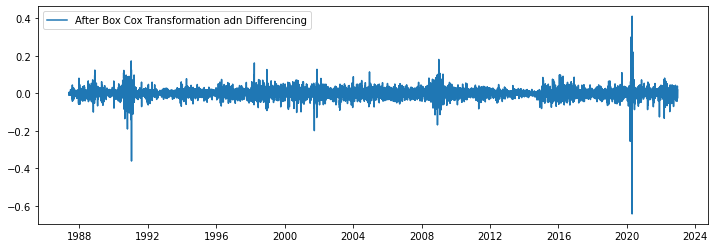

In [238]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

**Analysis** 

We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation. It is a horizontal trend. The mean became constant. The mean is zero. Also, the variance is almost constant. Lets test the Stationarity again.

## Augmented Dickey-Fuller (ADF) Test

In [239]:
adf_test = adfuller(data_boxcox_diff)

In [240]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -16.443326
p-value: 0.000000
Critical value @ 0.05: -2.86


p-value(0) < critical value(0.05)

ADF stats(-16.443326) < Critical value(-2.86).

Hence, Reject the null hypothesis.

The series is Stationary.



## Autocorrelation function (ACF)

In [241]:
from statsmodels.graphics.tsaplots import plot_acf

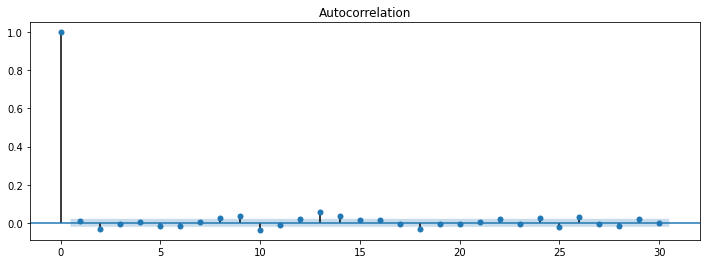

In [242]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

**Analysis:** The shaded portion is the less significant. With lag 0, the series is just correlated with itself. Hence, correlation=1 at lag=0. ACF captures both direct and indirect correlation with the lag time. 

## Partial autocorrelation function (PACF)

In [243]:
from statsmodels.graphics.tsaplots import plot_pacf

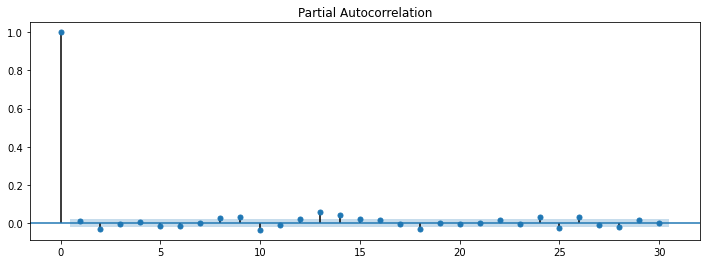

In [244]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Building the Regression Model

## Splitting Stationary dataset into train and test set

We are going to forecast for the last two years. 2021 and 2022.

Last 452 records contain 2021 and 2022 data.

In [245]:
# splitting Data into (90:10)
train_len = 8582   # Rows that we training in our Data 
train = df[0:train_len]
# 1959 and 1960 data
test = df[train_len:]

In [246]:
print(train.shape)
print(test.shape)

(8582, 6)
(452, 6)


##1. Naive method

Forecast = Last month’s data

Or the last data of the train set, which will be assigned to all the records of the test data.

In [247]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,date,Price,year,month,day,weekday
8582,2021-03-09,67.03,2021,3,9,1
8583,2021-03-10,67.53,2021,3,10,2
8584,2021-03-11,69.34,2021,3,11,3
8585,2021-03-12,68.87,2021,3,12,4
8586,2021-03-15,68.78,2021,3,15,5


In [248]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

In [249]:
y_hat_naive.head()

,date,Price,year,month,day,weekday,naive_forecast
8582,2021-03-09,67.03,2021,3,9,1,68.0
8583,2021-03-10,67.53,2021,3,10,2,68.0
8584,2021-03-11,69.34,2021,3,11,3,68.0
8585,2021-03-12,68.87,2021,3,12,4,68.0
8586,2021-03-15,68.78,2021,3,15,5,68.0


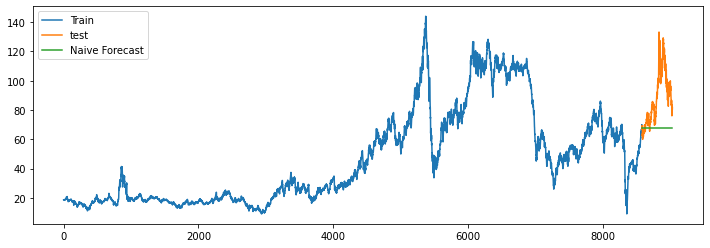

In [250]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

**Analysis:**

All the values are same as we assigned all the forecasting records to the last value of the train set.
The forecasting is undervalued when compared to the actual test data value.

# 2. Simple average method

Forecast = Average of all past months’ data

Average of all the train data values assigned to the test data.

In [251]:
y_hat_avg = test.copy()

In [252]:
y_hat_avg['avg_forecast'] = train['Price'].mean()

In [253]:
y_hat_avg.head()

,date,Price,year,month,day,weekday,avg_forecast
8582,2021-03-09,67.03,2021,3,9,1,46.401643
8583,2021-03-10,67.53,2021,3,10,2,46.401643
8584,2021-03-11,69.34,2021,3,11,3,46.401643
8585,2021-03-12,68.87,2021,3,12,4,46.401643
8586,2021-03-15,68.78,2021,3,15,5,46.401643


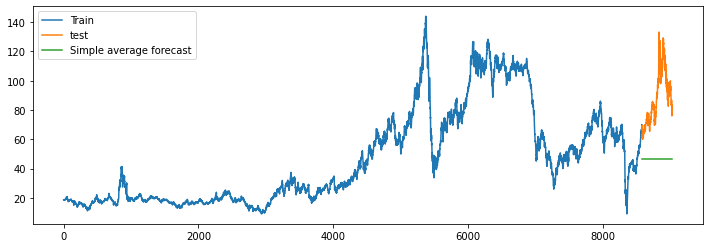

In [254]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

**Analysis**

We have under estimated the actual test value while doing the forecasting. Because we took the mean of all the lower values, while the trend of the time series is in increasing pattern.

## Calculate RMSE and MAPE Error

In [255]:
from sklearn.metrics import mean_squared_error

**Error for Naive method**

RMSE

In [256]:
# mean_squared_error is a sqaured term of the error
# In order to make the error comparable with the target variable, we have to take the square root of the error (RMSE)
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
rmse

27.08

MAPE (Mean absolute percentage error)

In [257]:
mape = round(np.mean(np.abs((test['Price'] - y_hat_naive['naive_forecast'])/test['Price'])*100),2)
mape

21.21

In [258]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,27.08,21.21


MAPE is the percentage of error.

So, we can see that we are 79% accurate to forecast.

**Error for Simple average method**

RMSE

In [259]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
rmse

45.72

MAPE

In [260]:
mape = round(np.mean(np.abs((test['Price'] - y_hat_avg['avg_forecast'])/test['Price'])*100),2)
mape

45.63

In [261]:
results = results.append({'Method':'Simple average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,27.08,21.21
1,Simple average method,45.72,45.63


We can see that both RMSE and MAPE errors have increased with the Simple average method.

Accuracy = 1 - MAPE

## 3. Simple moving average method

Considering the last observation in the time series has more impact on the future rather than the first observation, in the simple moving average method, we take the average of only the last observations to forecast the future.

In [262]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = df.copy()

In [263]:
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12

In [264]:
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = df['Price'].rolling(ma_window).mean()

In [265]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

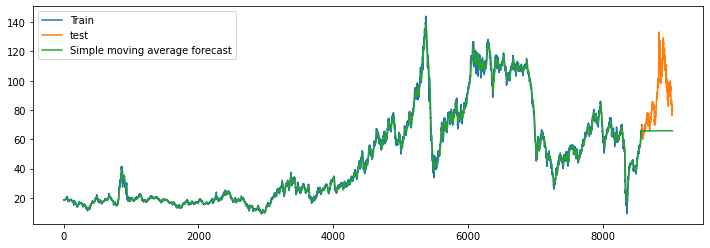

In [266]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

**Analysis:** We can see that the result is better than the simple avg or naive method. The seasonal effect can not be captured. There is a trend in the forecasting line which grows linearly. 

In [267]:
# We are taking only the test data points of y_hat_sma. After the train_len data points
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

28.77

In [268]:
mape = round(np.mean(np.abs((test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100),2)
mape

23.29

In [269]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,27.08,21.21
1,Simple average method,45.72,45.63
2,Simple moving average method,28.77,23.29


**Analysis:** We see far better results than the other two methods. Hence the recent past average data is better to forecast the future. 

# 4. Exponential Smoothing Family

Simple exponential smoothing (Captures - Only Level)

Holt's exponential smoothing (Level+Trend)

Holt's Winter exponential smoothing (Level+Trend+Seasonality)

1. Simple Exponential Smoothing

In [270]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [271]:
# Instantiate the model
model = SimpleExpSmoothing(train['Price'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=True)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 18.601381966369466,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [272]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

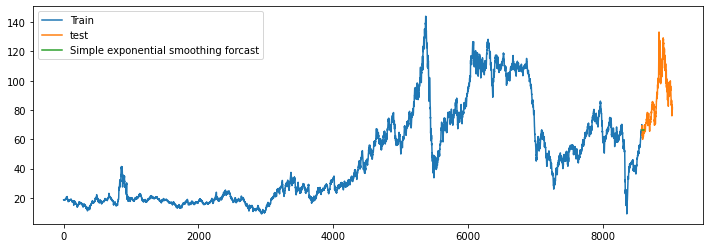

In [273]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

**Analysis:** No seasonality captures. Most recent observation gets higher weightages than the older ones for forecasting. 

In [274]:
# We are taking only the test data points of y_hat_sma. After the train_len data points
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

28.77

In [275]:
mape = round(np.mean(np.abs((test['Price'] - y_hat_ses['ses_forecast'])/test['Price'])*100),2)
mape

5.0

In [276]:
results = results.append({'Method':'Simple exponential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,27.08,21.21
1,Simple average method,45.72,45.63
2,Simple moving average method,28.77,23.29
3,Simple exponential smoothing method,28.77,5.00


# 5. Holt-Winters's Exponential Smoothing

In [277]:
# Additive Method
y_hat_hwa = test.copy()

In [278]:
# We have to pass an array of the dataframe into the ExponentialSmoothing instance
# seasonal_periods = 12. Because the seasonality is on monthly basis. If the seasonality would have quarterly basis then seasonal_periods = 4 (4 quarters in an year)
# seasonal=additive for additive method
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [279]:
model_fit = model.fit(optimized=True)

In [280]:
model_fit.params

{'smoothing_level': 0.9999991762401963,
 'smoothing_trend': 2.491223813028773e-08,
 'smoothing_seasonal': 1.1339642308328525e-08,
 'damping_trend': nan,
 'initial_level': 46.401748217673685,
 'initial_trend': 0.005673790136677578,
 'initial_seasons': array([-27.7729408 , -27.84850942, -27.83364654, -27.81051001,
        -27.82180729, -27.86337558, -27.8869079 , -27.80436279,
        -27.79976074, -27.79199878, -27.7538334 , -27.7813433 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [281]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(452)

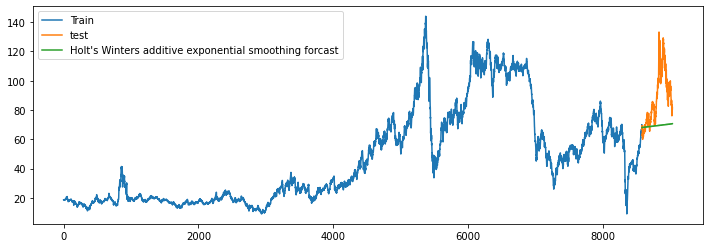

In [282]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

**Analysis:** It captures the trend, which we can see that the forecasted values are little higher level than the train level. It also captures teh seasonality. The peak of the forecasted value is little lesser than the actual.

In [283]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

25.76

In [284]:
mape = round(np.mean(np.abs((test['Price'] - y_hat_hwa['hwa_forecast'])/test['Price'])*100),2)
mape

19.84

In [285]:
results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,27.08,21.21
1,Simple average method,45.72,45.63
2,Simple moving average method,28.77,23.29
3,Simple exponential smoothing method,28.77,5.00
4,Holt's Winter additive method,25.76,19.84


***Analysis***
: We can see that the error of Holt's Winter additive method is more than Simple exponential smoothing method. As Simple exponential smoothing method error is very less we can conclude that predicted forcasting model is near to accuracy.

Multiplicative Method

In [286]:
y_hat_hwm = test.copy()

In [287]:
# seasonal=mul for multiplicative method
# trend='add' . We are not changing the trend. We are only chaning the seasonal from additive to multiplicative.
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12, trend='add', seasonal='mul')

In [288]:
model_fit = model.fit(optimized=True)

In [289]:
model_fit.params

{'smoothing_level': 0.999999953843366,
 'smoothing_trend': 2.0383202279260763e-07,
 'smoothing_seasonal': 4.645188288264549e-09,
 'damping_trend': nan,
 'initial_level': 40.78714563249354,
 'initial_trend': 0.012791431205156934,
 'initial_seasons': array([0.45688367, 0.45623469, 0.45647346, 0.45664621, 0.45683254,
        0.45661185, 0.45609848, 0.45688339, 0.45659654, 0.45677282,
        0.45697024, 0.45688218]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

We can see that 'initial_seasons' is factor as we used the multiplicative method.

In additive method 'initial_seasons' was negative sign.

In [290]:
# Forecast for last 24 months
y_hat_hwm['hwm_forecast'] = model_fit.forecast(452)

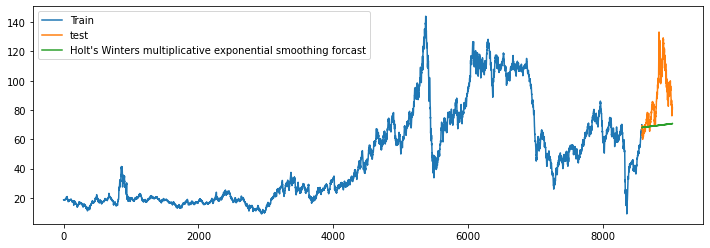

In [291]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [292]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hwm_forecast'])).round(2)
rmse

25.7

In [293]:
mape = round(np.mean(np.abs((test['Price'] - y_hat_hwm['hwm_forecast'])/test['Price'])*100),2)
mape

19.77

In [294]:
results = results.append({'Method':'Holt\'s Winter multiplicative method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,27.08,21.21
1,Simple average method,45.72,45.63
2,Simple moving average method,28.77,23.29
3,Simple exponential smoothing method,28.77,5.00
4,Holt's Winter additive method,25.76,19.84
5,Holt's Winter multiplicative method,25.70,19.77


**Analysis**: 
We can see that both Additive and multiplicate performed more or less well for forecasting.

##6. LSTM Model

In [295]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [296]:
data = pd.read_csv('Brent Oil Prices.csv',parse_dates=['Date'], index_col='Date')
data

,Europe Brent Spot Price FOB (Dollars per Barrel)
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-12-13,80.14
2022-12-14,83.33
2022-12-15,82.34


In [297]:
data.head()

,Europe Brent Spot Price FOB (Dollars per Barrel)
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [298]:
data=data.rename({'Date':'date', 'Europe Brent Spot Price FOB (Dollars per Barrel)':'Price'},axis=1)
data

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-12-13,80.14
2022-12-14,83.33
2022-12-15,82.34


In [299]:
# Creating a list of monthly data list 
monthly_data_list = []
year_list = data.index.year.unique()
month_list = sorted(data.index.month.unique())
for year in year_list:
    for month in month_list:
        last_day_data = data[(data.index.year == year) &
                               (data.index.month == month)].tail(1)
        monthly_data_list.append(last_day_data)
data_monthly = pd.concat(monthly_data_list)
data_monthly.index = pd.to_datetime(
    data_monthly.index.strftime("%Y-%m"))  # reset index to YYYY-01-01
ts_log = np.log(data_monthly).copy()
data_monthly.head()

,Price
Date,
1987-05-01,18.58
1987-06-01,19.08
1987-07-01,20.03
1987-08-01,18.63
1987-09-01,18.48


In [300]:
data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 428 entries, 1987-05-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   428 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


## Data preprocessing

In [301]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [302]:
timeseries_data = data_monthly['Price'].tolist()
print(timeseries_data)

[18.58, 19.08, 20.03, 18.63, 18.48, 18.8, 17.7, 17.6, 16.28, 14.73, 15.65, 16.6, 16.2, 14.18, 15.75, 14.4, 11.93, 12.6, 14.35, 16.23, 16.38, 17.23, 20.45, 20.15, 18.25, 18.28, 16.3, 17.2, 18.23, 18.93, 18.48, 21.05, 20.5, 19.2, 17.95, 16.35, 15.3, 15.73, 19.23, 27.8, 41.0, 34.3, 31.2, 28.35, 20.7, 19.5, 18.0, 19.7, 19.0, 18.48, 19.65, 20.53, 21.43, 22.0, 20.08, 17.75, 18.15, 17.45, 19.09, 19.65, 20.7, 20.6, 20.38, 19.65, 20.18, 19.13, 19.25, 17.85, 18.48, 18.83, 18.7, 18.85, 18.43, 17.43, 16.85, 16.73, 17.23, 15.43, 14.23, 13.18, 14.83, 13.59, 13.25, 15.35, 16.18, 17.45, 18.48, 16.03, 16.73, 17.18, 16.95, 16.23, 16.8, 17.23, 17.98, 18.98, 17.58, 16.58, 15.78, 16.2, 16.58, 16.58, 17.13, 18.65, 16.63, 18.8, 20.33, 19.5, 18.1, 19.28, 19.0, 20.98, 24.15, 22.8, 23.17, 23.9, 23.28, 19.44, 18.53, 18.25, 18.99, 18.22, 18.94, 17.98, 19.96, 19.42, 18.96, 15.86, 15.59, 13.53, 13.87, 13.79, 14.03, 11.84, 12.63, 12.06, 14.71, 12.0, 9.91, 10.54, 11.34, 10.58, 15.02, 16.45, 14.75, 16.97, 19.97, 21.08

In [303]:
# choose a number of time steps in months
n_steps = 12
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [304]:
print(X),print(y)

[[ 18.58  19.08  20.03 ...  14.73  15.65  16.6 ]
 [ 19.08  20.03  18.63 ...  15.65  16.6   16.2 ]
 [ 20.03  18.63  18.48 ...  16.6   16.2   14.18]
 ...
 [ 83.1   70.86  77.24 ... 111.51  96.55  88.9 ]
 [ 70.86  77.24  92.35 ...  96.55  88.9   93.3 ]
 [ 77.24  92.35 103.08 ...  88.9   93.3   85.61]]
[ 16.2   14.18  15.75  14.4   11.93  12.6   14.35  16.23  16.38  17.23
  20.45  20.15  18.25  18.28  16.3   17.2   18.23  18.93  18.48  21.05
  20.5   19.2   17.95  16.35  15.3   15.73  19.23  27.8   41.    34.3
  31.2   28.35  20.7   19.5   18.    19.7   19.    18.48  19.65  20.53
  21.43  22.    20.08  17.75  18.15  17.45  19.09  19.65  20.7   20.6
  20.38  19.65  20.18  19.13  19.25  17.85  18.48  18.83  18.7   18.85
  18.43  17.43  16.85  16.73  17.23  15.43  14.23  13.18  14.83  13.59
  13.25  15.35  16.18  17.45  18.48  16.03  16.73  17.18  16.95  16.23
  16.8   17.23  17.98  18.98  17.58  16.58  15.78  16.2   16.58  16.58
  17.13  18.65  16.63  18.8   20.33  19.5   18.1   19.28  19.  

(None, None)

In [305]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [306]:
X.shape

(416, 12, 1)

Building LSTM Model By Applying Recurrent Neural Network

In [307]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
13/13 [==============================] - 5s 26ms/step - loss: 443.5334
Epoch 2/300
13/13 [==============================] - 0s 25ms/step - loss: 179.7733
Epoch 3/300
13/13 [==============================] - 0s 25ms/step - loss: 130.4465
Epoch 4/300
13/13 [==============================] - 0s 25ms/step - loss: 102.7468
Epoch 5/300
13/13 [==============================] - 0s 24ms/step - loss: 83.0490
Epoch 6/300
13/13 [==============================] - 0s 25ms/step - loss: 81.7895
Epoch 7/300
13/13 [==============================] - 0s 25ms/step - loss: 100.0944
Epoch 8/300
13/13 [==============================] - 0s 25ms/step - loss: 75.2379
Epoch 9/300
13/13 [==============================] - 0s 28ms/step - loss: 64.2477
Epoch 10/300
13/13 [==============================] - 0s 27ms/step - loss: 60.2092
Epoch 11/300
13/13 [==============================] - 0s 22ms/step - loss: 73.1938
Epoch 12/300
13/13 [==============================] - 0s 20ms/step - loss: 81.8687
Epoch 13

Predicting For the next 36 months data

In [308]:
# demonstrate prediction for next 10 days
x_input = np.array([92.35, 103.08, 107.29, 108.36, 125.53, 119.78, 111.51, 96.55, 88.9, 93.3, 85.61, 81.66])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<37):
    
    if(len(temp_input)>12):
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[77.00343]
1 month input [103.08       107.29       108.36       125.53       119.78
 111.51        96.55        88.9         93.3         85.61
  81.66        77.00343323]
1 month output [[71.64784]]
2 month input [107.29       108.36       125.53       119.78       111.51
  96.55        88.9         93.3         85.61        81.66
  77.00343323  71.64784241]
2 month output [[73.296326]]
3 month input [108.36       125.53       119.78       111.51        96.55
  88.9         93.3         85.61        81.66        77.00343323
  71.64784241  73.29632568]
3 month output [[80.86948]]
4 month input [125.53       119.78       111.51        96.55        88.9
  93.3         85.61        81.66        77.00343323  71.64784241
  73.29632568  80.86947632]
4 month output [[88.77266]]
5 month input [119.78       111.51        96.55        88.9         93.3
  85.61        81.66        77.00343323  71.64784241  73.29632568
  80.86947632  88.7726593 ]
5 month output [[86.28705]]
6 month input [111.51 

In [309]:
# These are predected prices of the next 36 month 
lst_output

[77.00343,
 71.64784,
 73.296326,
 80.86948,
 88.77266,
 86.28705,
 81.602295,
 78.09374,
 74.46992,
 69.83576,
 64.009346,
 56.194153,
 39.16546,
 25.214054,
 28.486359,
 37.15934,
 39.00842,
 43.456345,
 42.107655,
 38.26538,
 40.80744,
 35.175385,
 24.085732,
 24.420218,
 27.818993,
 30.09719,
 29.00039,
 29.089827,
 28.506964,
 29.123827,
 30.047646,
 29.909647,
 31.037697,
 30.729418,
 32.132244,
 33.891956,
 32.809917]

## Visualizaing The Output

In [310]:
month_new=np.arange(1,429)
month_pred=np.arange(429,466)

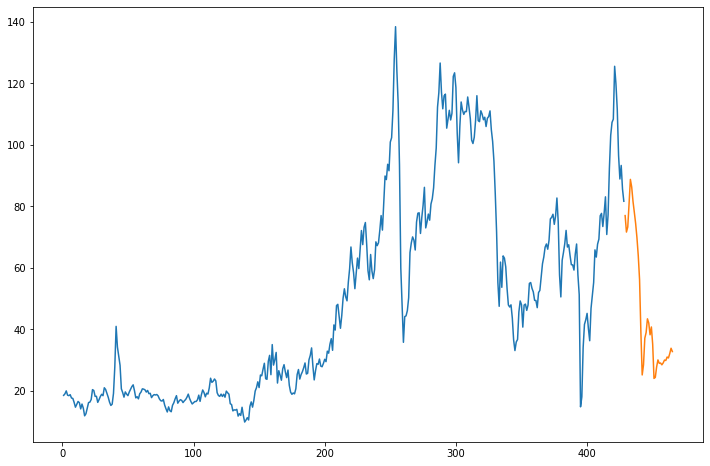

In [311]:
plt.plot(month_new,timeseries_data)
plt.plot(month_pred,lst_output)

## 7. Prophet Model

In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
!conda install -c conda-forge fbprophet -y

/bin/bash: conda: command not found


In [313]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [314]:
!pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [315]:
from prophet import Prophet

In [316]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [317]:
train

,date,Price,year,month,day,weekday
0,1987-05-20,18.63,1987,5,20,2
1,1987-05-21,18.45,1987,5,21,3
2,1987-05-22,18.55,1987,5,22,4
3,1987-05-25,18.60,1987,5,25,5
4,1987-05-26,18.63,1987,5,26,1
...,...,...,...,...,...,...
8577,2021-03-02,63.17,2021,3,2,1
8578,2021-03-03,64.70,2021,3,3,2
8579,2021-03-04,67.32,2021,3,4,3
8580,2021-03-05,69.95,2021,3,5,4


In [318]:
test

,date,Price,year,month,day,weekday
8582,2021-03-09,67.03,2021,3,9,1
8583,2021-03-10,67.53,2021,3,10,2
8584,2021-03-11,69.34,2021,3,11,3
8585,2021-03-12,68.87,2021,3,12,4
8586,2021-03-15,68.78,2021,3,15,5
...,...,...,...,...,...,...
9029,2022-12-13,80.14,2022,12,13,1
9030,2022-12-14,83.33,2022,12,14,2
9031,2022-12-15,82.34,2022,12,15,3
9032,2022-12-16,80.20,2022,12,16,4


In [319]:
test=test.rename(columns={'date':'ds','Price':'y'})
test=test.drop(['year', 'month', 'day', 'weekday'], axis=1)
test.head()

,ds,y
8582,2021-03-09,67.03
8583,2021-03-10,67.53
8584,2021-03-11,69.34
8585,2021-03-12,68.87
8586,2021-03-15,68.78


In [322]:
test

,ds,y
8582,2021-03-09,67.03
8583,2021-03-10,67.53
8584,2021-03-11,69.34
8585,2021-03-12,68.87
8586,2021-03-15,68.78
...,...,...
9029,2022-12-13,80.14
9030,2022-12-14,83.33
9031,2022-12-15,82.34
9032,2022-12-16,80.20


In [325]:
model = Prophet()
model.fit(test)
#Adding 90 days to the existing dates in the 'test' dataframe
future=model.make_future_dataframe(periods=90)
forecast=model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fxernnp/7wbqi05y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4fxernnp/b0pn7g22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93923', 'data', 'file=/tmp/tmp4fxernnp/7wbqi05y.json', 'init=/tmp/tmp4fxernnp/b0pn7g22.json', 'output', 'file=/tmp/tmp4fxernnp/prophet_model7itqgn42/prophet_model-20230113101146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:11:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [326]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

Based on the comment above and output of the model.component, we can see that daily seasonily doesnot play a huge part, yearly and weekly seasonality contribute towards the trends

In [327]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
537,2023-03-15,63.634423,54.680250,72.701642
538,2023-03-16,63.323848,54.642293,72.164611
539,2023-03-17,63.514914,55.182607,71.529158
540,2023-03-18,64.359121,55.487960,73.110745
541,2023-03-19,64.168501,55.024285,73.257239


yhat - The actual prediction/projection yhatlower & yhat_upper - The upper and lower limits for the yhat at each date value

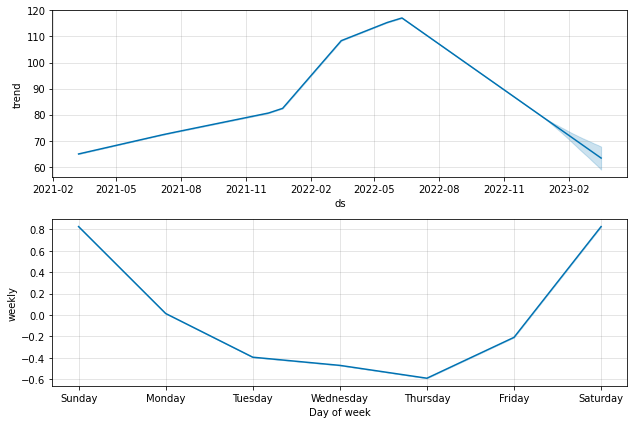

In [328]:
fig1=model.plot_components(forecast)

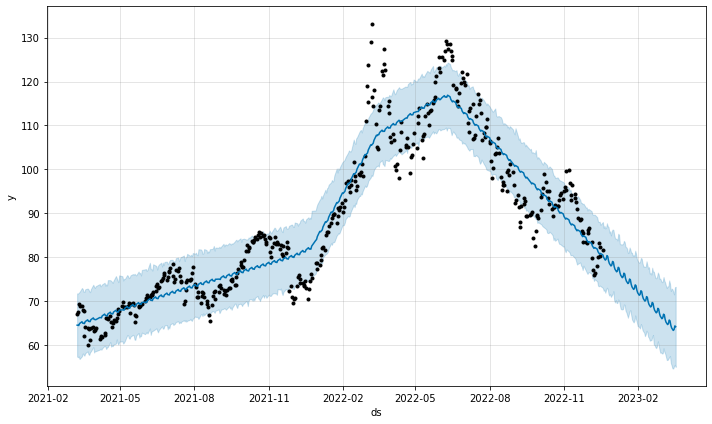

In [332]:
fig2=model.plot(forecast)